<a href="https://colab.research.google.com/github/errasti13/flowINN/blob/master/jupyterNotebooks/MinimalChannelFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/errasti13/flowINN.git

Cloning into 'flowINN'...
remote: Enumerating objects: 713, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 713 (delta 9), reused 0 (delta 0), pack-reused 688 (from 1)
Receiving objects: 100% (713/713), 2.27 MiB | 1.69 MiB/s, done.
Resolving deltas: 100% (423/423), done.


In [5]:
%cd flowINN

/content/flowINN/flowINN


In [10]:
pip install . -q

  Preparing metadata (setup.py) ... done


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 30)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 60)                  │           1,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 90)                  │           5,490 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 60)                  │           5,460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │             124 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,884 (58.14 KB)

 Trainable params: 14,884 (58.14 KB)

 Non-trainable params: 0 (0.00 B)

Generating mesh...
Starting training...
Epoch 100: Loss = 0.022803891450166702
Epoch 200: Loss = 0.0193469375371933
Epoch 300: Loss = 0.021760806441307068
Epoch 400: Loss = 0.017895733937621117
Epoch 500: Loss = 0.01759774051606655
Epoch 600: Loss = 0.017460694536566734
Epoch 700: Loss = 0.017409617081284523
Epoch 800: Loss = 0.017314422875642776
Epoch 900: Loss = 0.01755017787218094
Epoch 1000: Loss = 0.017098931595683098
Epoch 1100: Loss = 0.017356716096401215
Epoch 1200: Loss = 0.019283711910247803
Epoch 1300: Loss = 0.016889052465558052
Epoch 1400: Loss = 0.016853567212820053
Epoch 1500: Loss = 0.017583636566996574
Epoch 1600: Loss = 0.016769327223300934
Epoch 1700: Loss = 0.01682165265083313
Epoch 1800: Loss = 0.01694227196276188
Epoch 1900: Loss = 0.016932202503085136
Epoch 2000: Loss = 0.018467437475919724
Epoch 2100: Loss = 0.01680043525993824
Epoch 2200: Loss = 0.016658823937177658
Epoch 2300: Loss = 0.016637440770864487
Epoch 2400: Loss = 0.016995307058095932
Epoch 2500: Loss

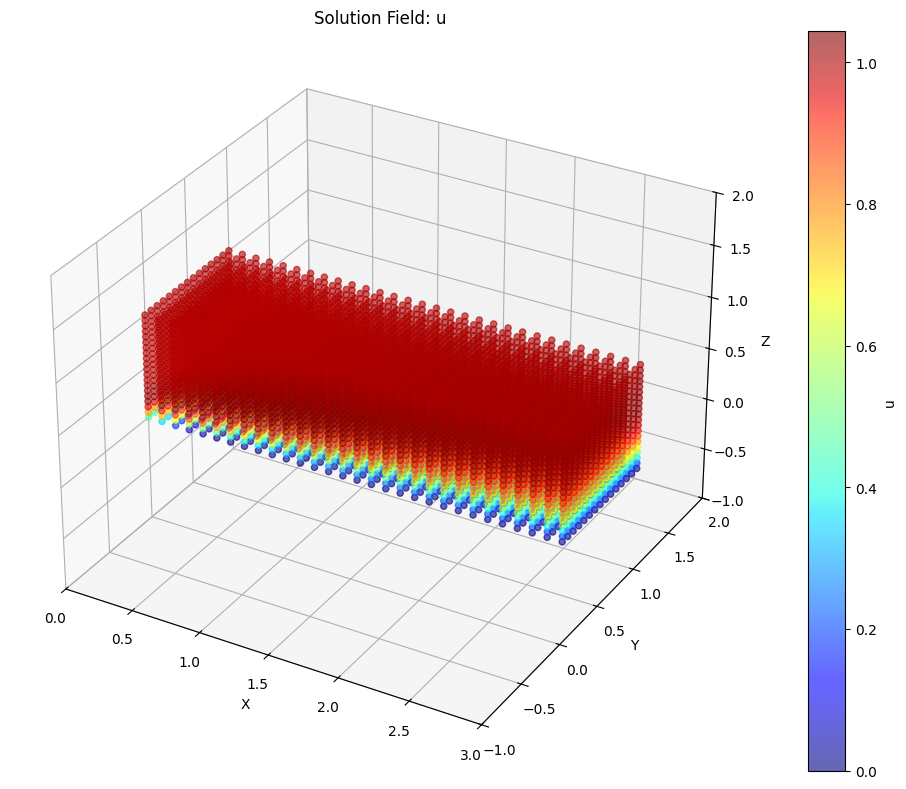

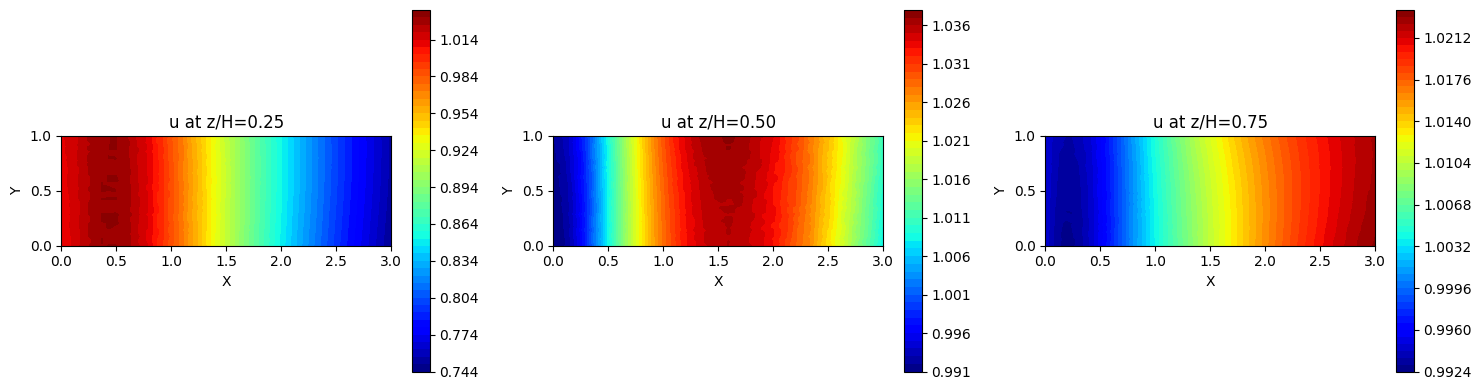

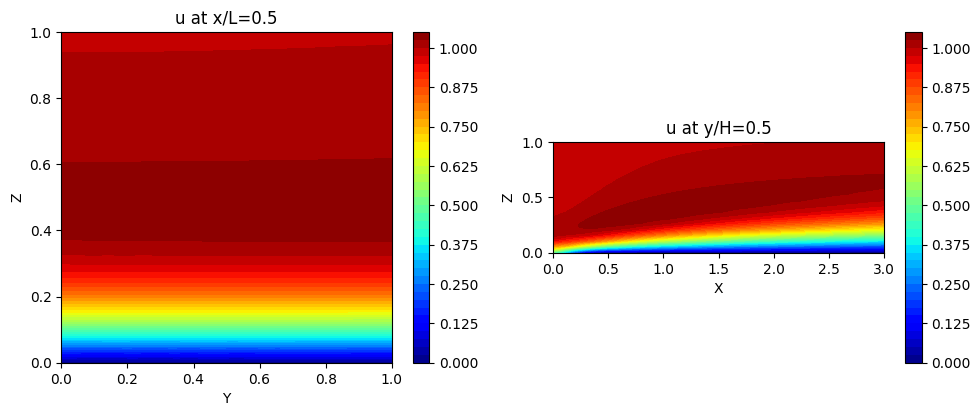

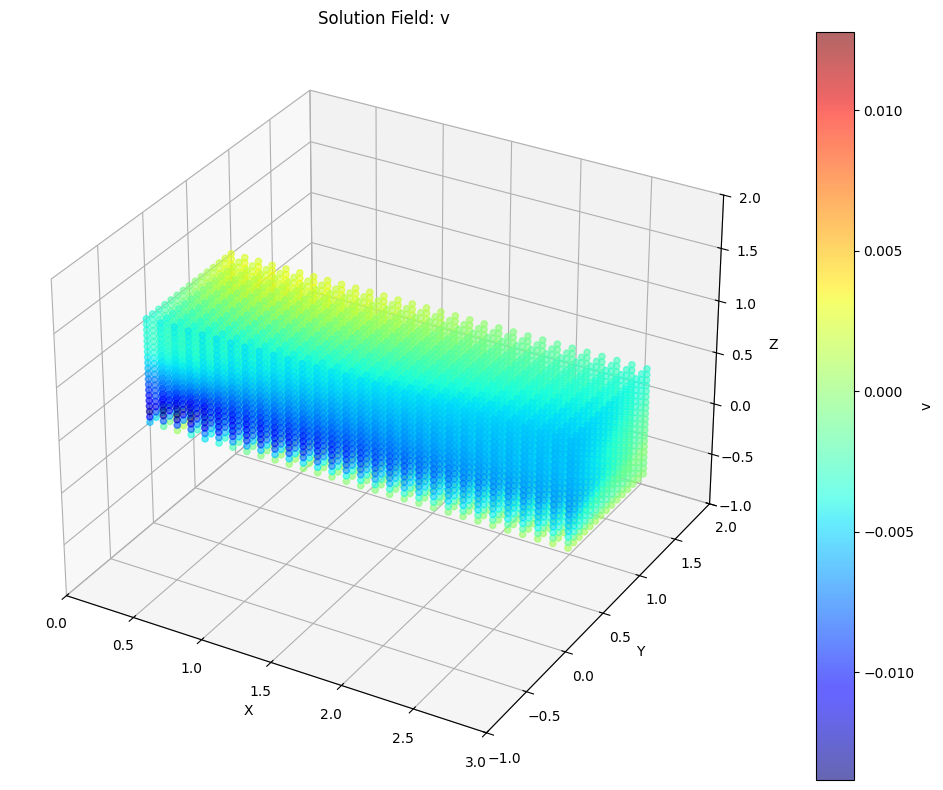

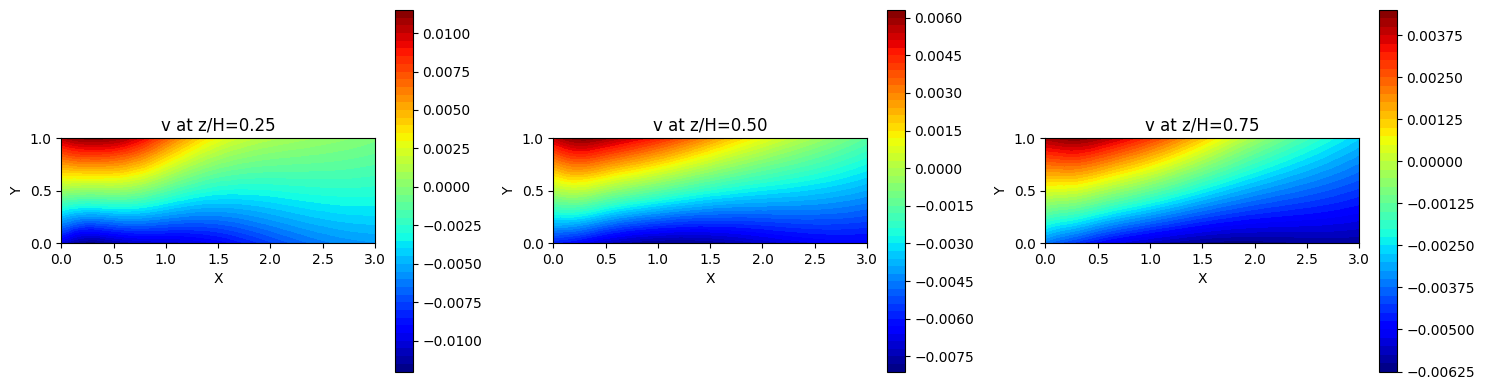

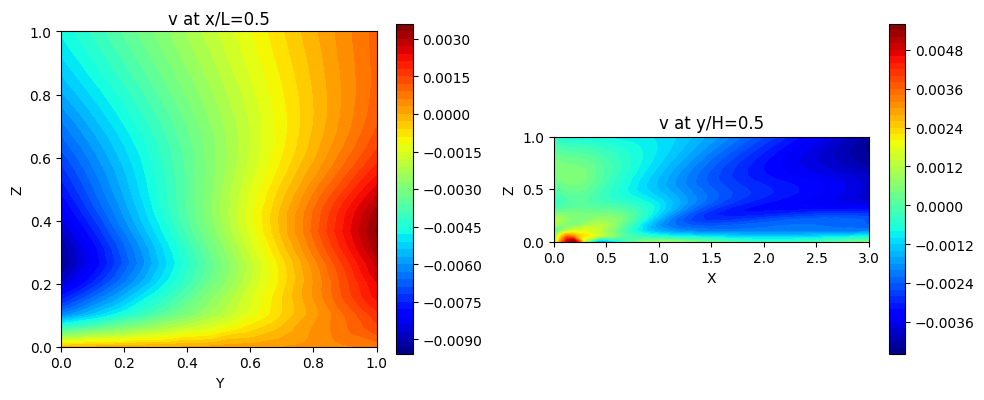

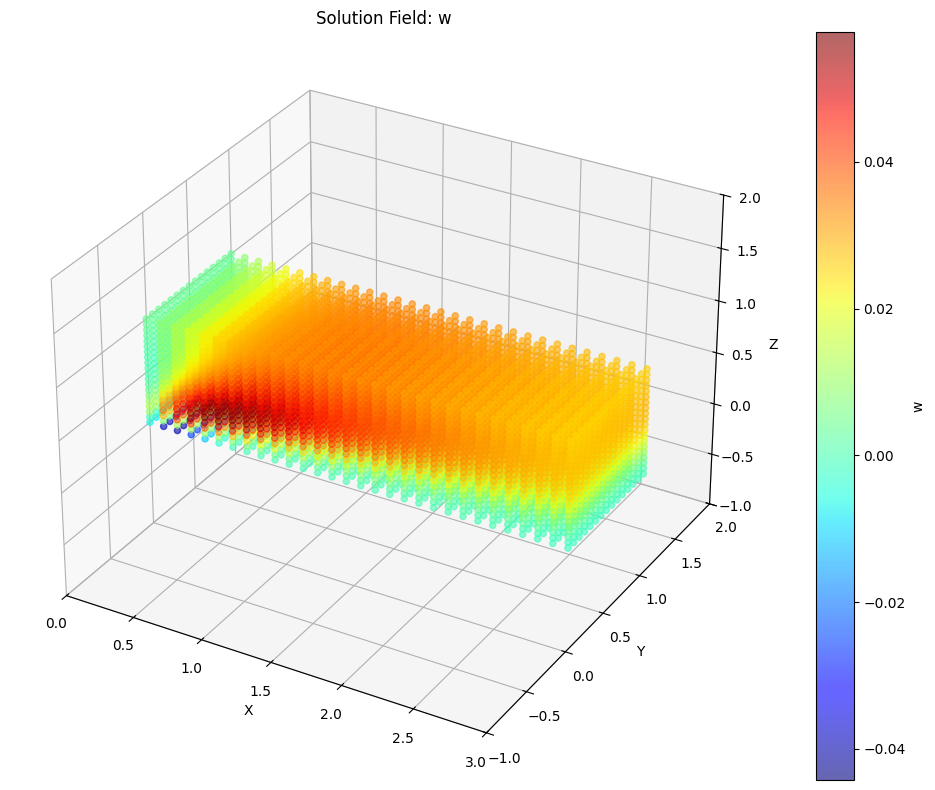

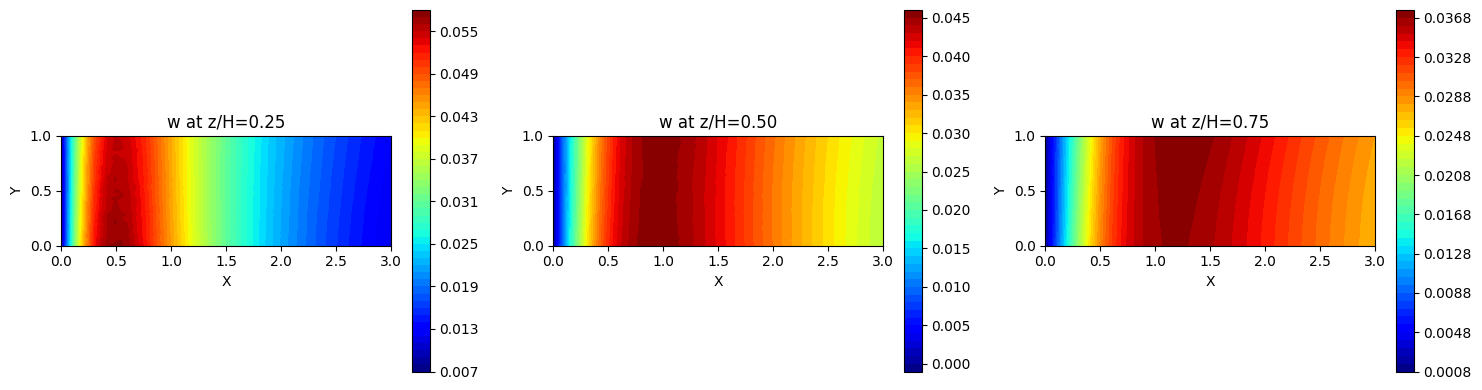

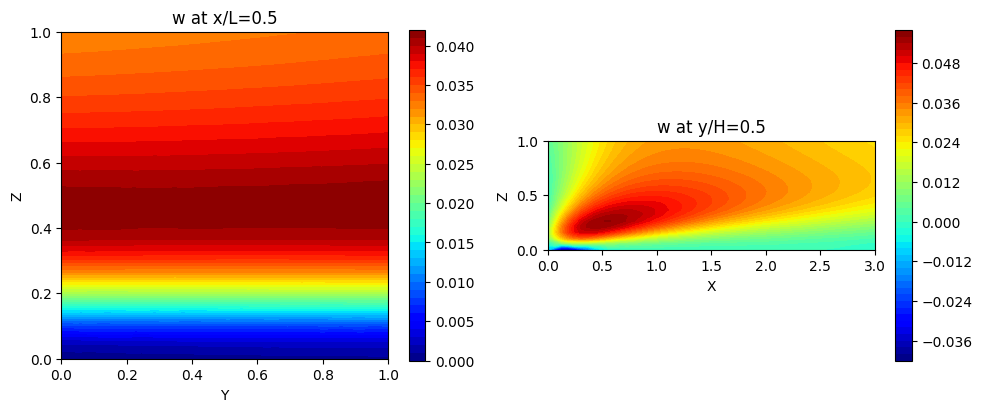

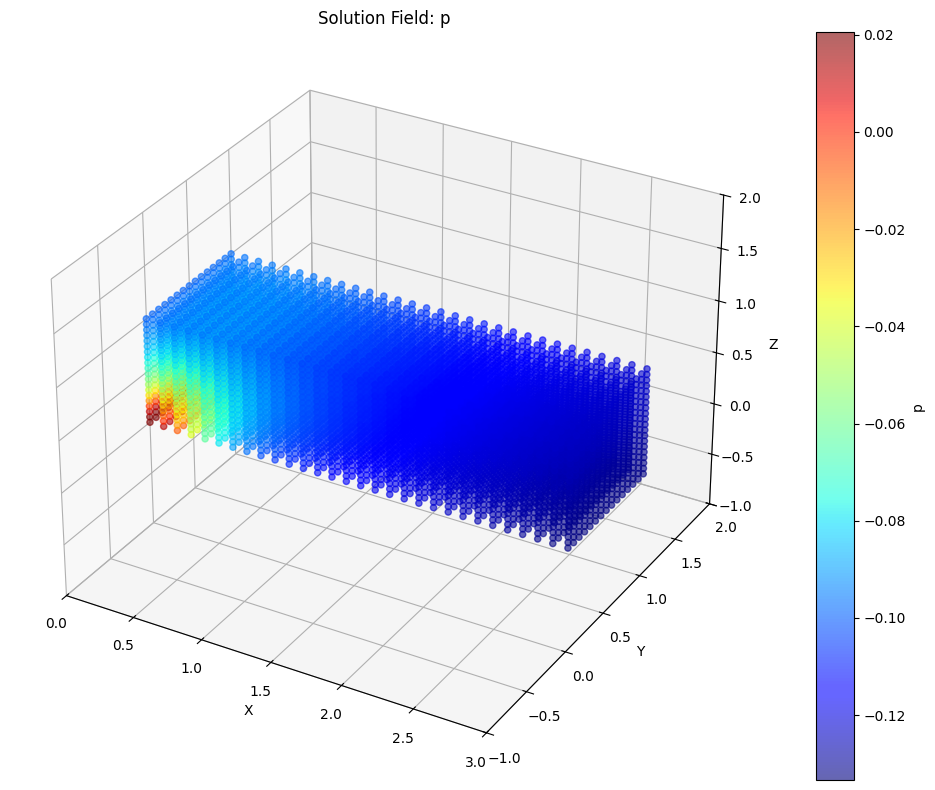

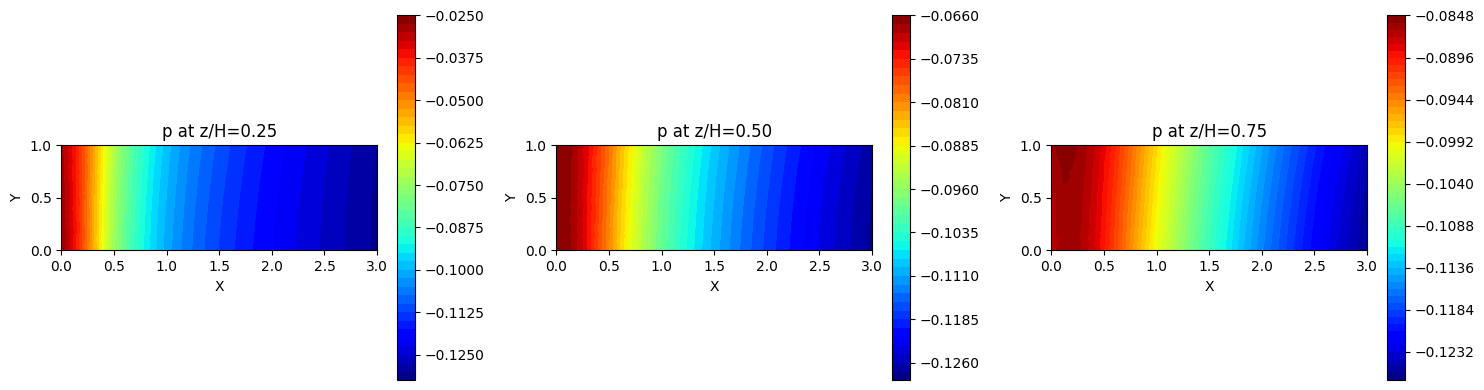

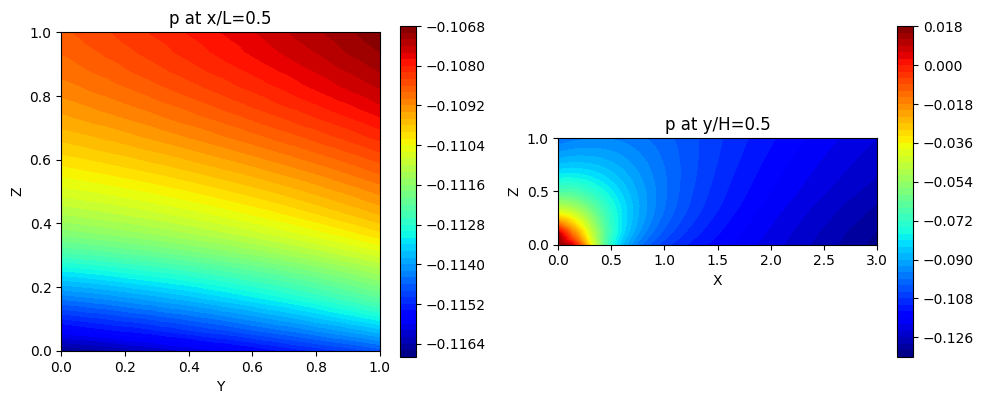

Simulation completed successfully!


In [9]:
from src.tests.MinimalChannelFlow import MinimalChannelFlow

def main():
    # Define simulation parameters
    case_name = "channel_flow_3d"
    x_range = (0.0, 3.0)  # Channel length
    y_range = (0.0, 1.0)   # Channel height
    z_range = (0.0, 1.0)   # Channel width

    # Training parameters
    epochs = 5000
    print_interval = 100
    autosave_interval = 2500

    # Mesh parameters
    nx = 30
    ny = 15
    nz = 20
    n_boundary = 100

    trainedModel = False

    try:
        # Initialize channel flow
        channel = MinimalChannelFlow(case_name, x_range, y_range, z_range)

        # Generate mesh
        print("Generating mesh...")
        channel.generateMesh(Nx=nx, Ny=ny, Nz=nz,
                           NBoundary=n_boundary,
                           sampling_method='uniform')

        # Train the model
        if trainedModel:
            print("Loading pre-trained model...")
            channel.load_model()
        else:
            print("Starting training...")
            channel.train(epochs=epochs,
                        print_interval=print_interval,
                        autosaveInterval=autosave_interval)

        # Predict and visualize
        print("Predicting flow field...")
        channel.predict()

        # Plot results
        print("Generating plots...")
        channel.plot(solkey='u')  # Velocity in x-direction
        channel.plot(solkey='v')  # Velocity in y-direction
        channel.plot(solkey='w')  # Velocity in z-direction
        channel.plot(solkey='p')  # Pressure field

        print("Simulation completed successfully!")

    except Exception as e:
        print(f"Error during simulation: {str(e)}")
        raise

if __name__ == "__main__":
    main()